# <center>**PREDICT SALARY USING THEIR EXPERIENCE**<center>

**IMPORTING LIBRARIES**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import r2_score,mean_squared_error

**READING THE DATA**

In [3]:
df=pd.read_csv('/kaggle/input/salary/Salary.csv')

In [4]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


*****ANALYSING THE DATA******* **

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


In [6]:
df.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


**CHECKING FOR NULL VALUES**

In [7]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

As there is no null values(missing data) we dont need to clean the data.

**PLOTTING**

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

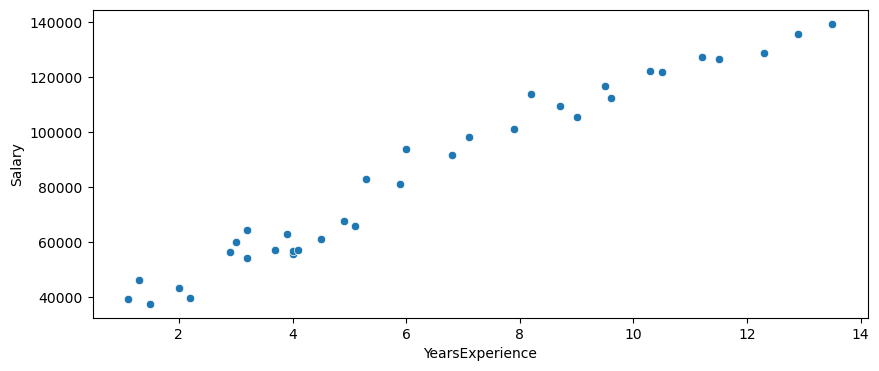

In [8]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=df,x='YearsExperience',y='Salary')

**TO GET A BETTER UNDERSTANDING BETWEEN SALARY AND EXPERIENCE WE USE PAIR PLOT**

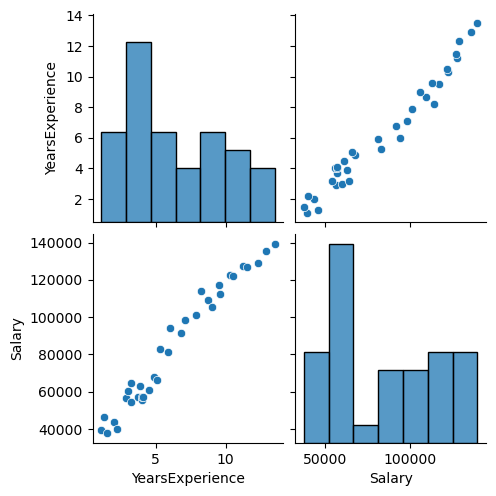

In [9]:
sns.pairplot(data=df)

**Determine the Data for features and label**

In [10]:
#X=df['YearsExperience']
#X.shape

In [11]:
X=df.drop('Salary',axis=1)
y=df['Salary']

In [12]:
print(" X shape :",X.shape)
print("y shape :",y.shape)

 X shape : (35, 1)
y shape : (35,)


In [13]:
#y=df['Salary']
#y.shape

**SPLITTING DATA TO TRAIN AND TEST**

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [16]:
print("Training feature shape", X_train.shape)
print("Training variable shape",y_train.shape)
print("Testing feature shape", X_test.shape)
print("Testing variable shape",y_test.shape)

Training feature shape (24, 1)
Training variable shape (24,)
Testing feature shape (11, 1)
Testing variable shape (11,)


**FIT AND TRAIN THE MODE**L

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
model=LinearRegression()

In [19]:
model.fit(X_train,y_train)

LinearRegression()

**PREDICT**

In [20]:
#Using LR - predict the y variables with X_test data 
y_pred=model.predict(X_test)

In [21]:
y_pred.shape

(11,)

**TESTING THE ACCURACY OF THE MODEL**


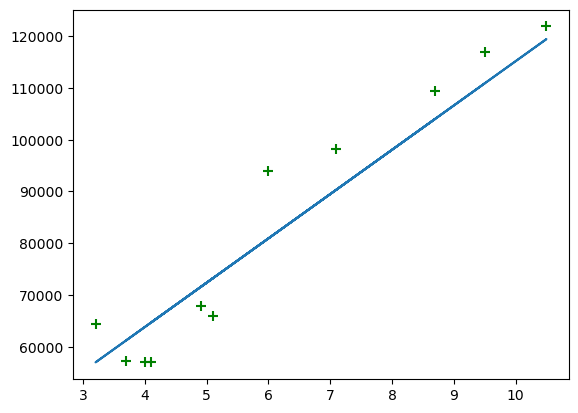

In [22]:
# green actual data
plt.scatter(X_test,y_test,s=55,c='green',marker='+')
# red predicted data
plt.plot(X_test,y_pred)

Error is very less

In [23]:
diff=y_test-y_pred
diff.shape

(11,)

Creating a Dataframe for finding the difference on Actual data , Predicted data and difference between the Actual and Predicted data

In [24]:
pd.DataFrame(np.c_[y_test,y_pred,diff],columns=['Actual','Predicted','Difference'])

,Actual,Predicted,Difference
0,116969.0,110877.795834,6091.204166
1,57081.0,64678.964211,-7597.964211
2,109431.0,104033.524482,5397.475518
3,98273.0,90344.981779,7928.018221
4,67938.0,71523.235563,-3585.235563
5,121872.0,119433.135023,2438.864977
6,93940.0,80934.108671,13005.891329
7,56957.0,63823.430292,-6866.430292
8,64445.0,56979.158941,7465.841059
9,66029.0,73234.303401,-7205.303401


Visualize Model, that how it is performing on training data
The following graph shows the Salary vs Experience (Training Set)

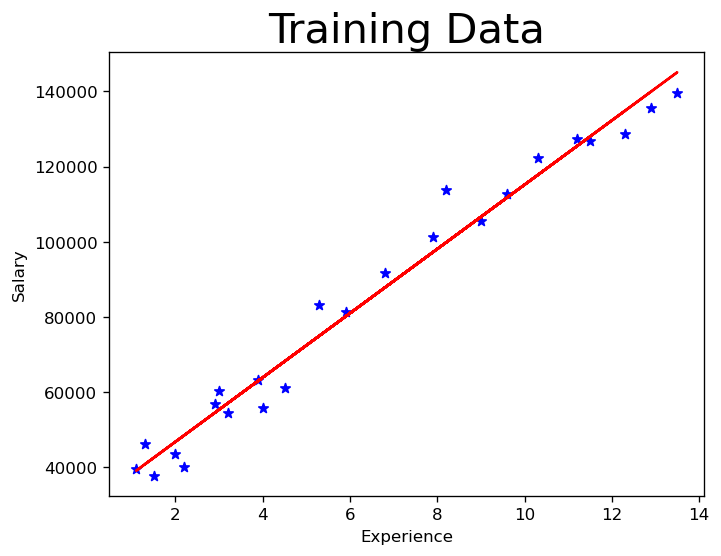

In [25]:
plt.figure(dpi=120)
plt.title('Training Data',fontsize=25)
plt.scatter(X_train,y_train,c='blue',marker='*',s=35,label='Training data')
plt.plot(X_train,model.predict(X_train),c='red',label='Reg line')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()


Visualize Model, that how it is performing on testing data
The following graph shows the Salary vs Experience (Test Set).

Text(0, 0.5, 'Salary')

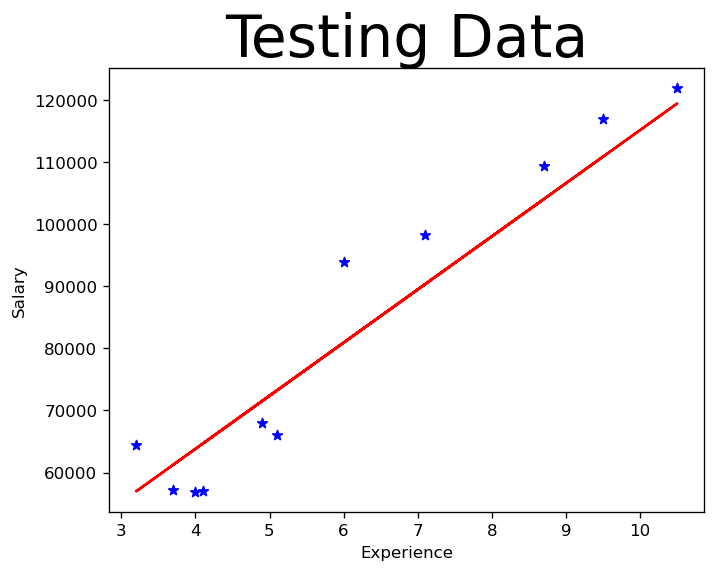

In [26]:
plt.figure(dpi=120)
plt.title('Testing Data',fontsize=35)
plt.scatter(X_test,y_test,c='blue',marker='*')
plt.plot(X_test,model.predict(X_test),c='red')
plt.xlabel('Experience')
plt.ylabel('Salary')


**EVALUATE**

In [27]:
model.score(X_test,y_test)

0.9171426108885095

In [28]:
model.score(X_train,y_train)

0.9755630578296774

In [29]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [30]:
MAE=mean_absolute_error(y_test,y_pred)
MSE=mean_squared_error(y_test,y_pred)
RMSE=np.sqrt(MSE)
r2=r2_score(y_test,y_pred)

In [31]:
pd.DataFrame([MAE,MSE,RMSE,r2],index=['MAE','MSE','RMSE','R2'],columns=['METRICS'])

,METRICS
MAE,6.513642e+03
MSE,4.964759e+07
RMSE,7.046105e+03
R2,9.171426e-01


**TEST ON CUSTOM DATA**

In [32]:
exp=3
model.predict([[exp]])[0]
print(f"Salary of {exp} year experience employee ={int(model.predict([[exp]])[0])}thousands")

Salary of 3 year experience employee =55268thousands


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
